#### Chapter 5
### Analyzing Neural Time Series Data
Python code for Chapter 5 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.io import loadmat

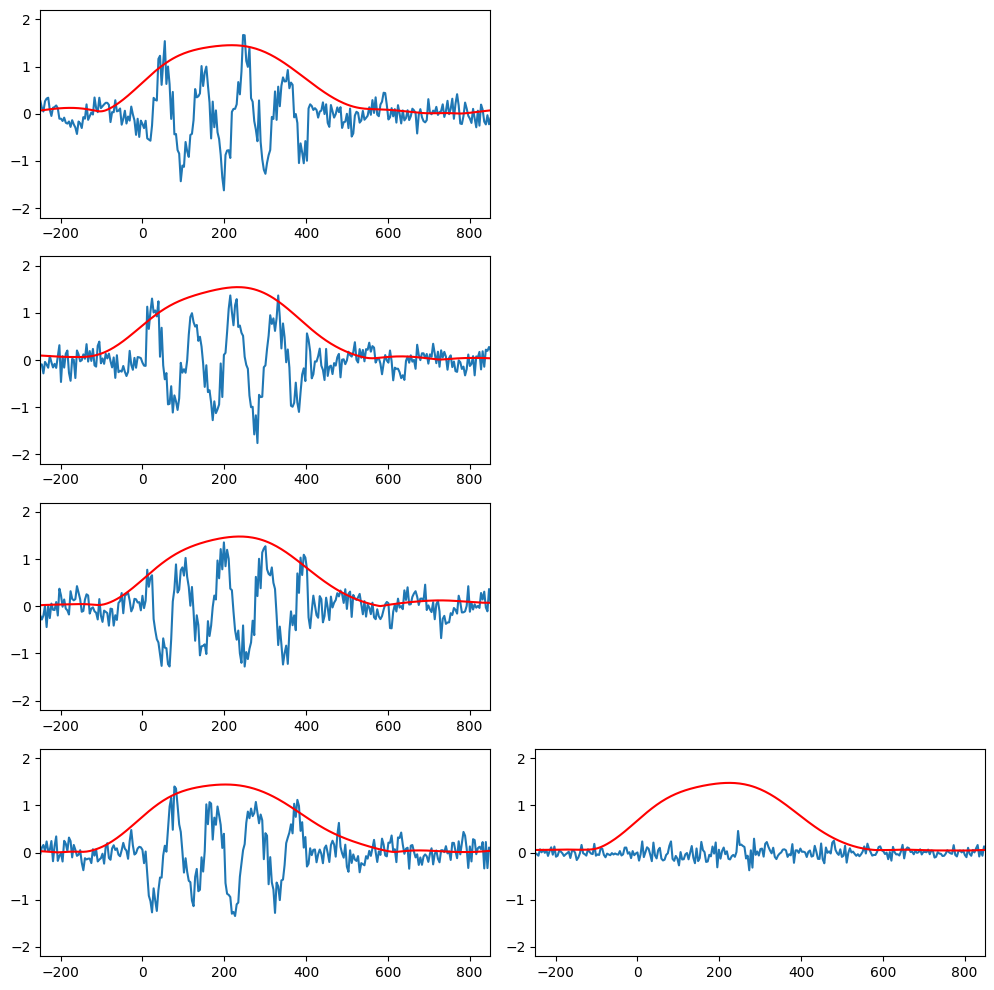

In [ ]:
# Time-locked and non-phase-locked analysis

# Load sample data
EEG = loadmat('../data/sampleEEGdata.mat')['EEG'][0, 0]

nTrials = 4
data = np.zeros((nTrials, EEG['pnts'][0][0]))

# Wavelet parameters
wavetime = np.arange(-1, 1 + 1/EEG['srate'][0][0], 1/EEG['srate'][0][0])
n_conv = len(wavetime) + EEG['pnts'][0][0] - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, EEG['pnts'][0][0]))

plt.figure(figsize=(15, 10))

for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * EEG['times'][0] / 1000 + 2 * np.pi * (triali + 1) / nTrials - np.pi) + np.random.randn(EEG['pnts'][0][0]) / 6
    # Add non-phase-locked stimulus potential
    data[triali, 259:360] = data[triali, 259:360] + np.sin(2 * np.pi * 10 * EEG['times'][0][259:360] / 1000 + 2 * np.pi * (triali + 1) / nTrials - np.pi) + np.random.randn(101) / 5
    
    # Convolve with 10Hz wavelet
    convolution_result_fft = ifft(waveletfft * fft(data[triali, :], n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    convolution_result_fft = convolution_result_fft[int(np.floor(len(wavetime) / 2)) : -int(np.floor(len(wavetime) / 2))]
    data10hz[triali, :] = np.abs(convolution_result_fft)*2
    
    # Plot single trials
    plt.subplot(nTrials, 3, (triali) * 3 + 1)
    plt.plot(EEG['times'][0], data[triali, :])
    plt.plot(EEG['times'][0], data10hz[triali, :], 'r')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])

# Plot the mean over trials
plt.subplot(nTrials, 3, (triali) * 3 + 2)
plt.plot(EEG['times'][0], np.mean(data, axis=0))
plt.plot(EEG['times'][0], np.mean(data10hz, axis=0), 'r')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.tight_layout()
plt.show()

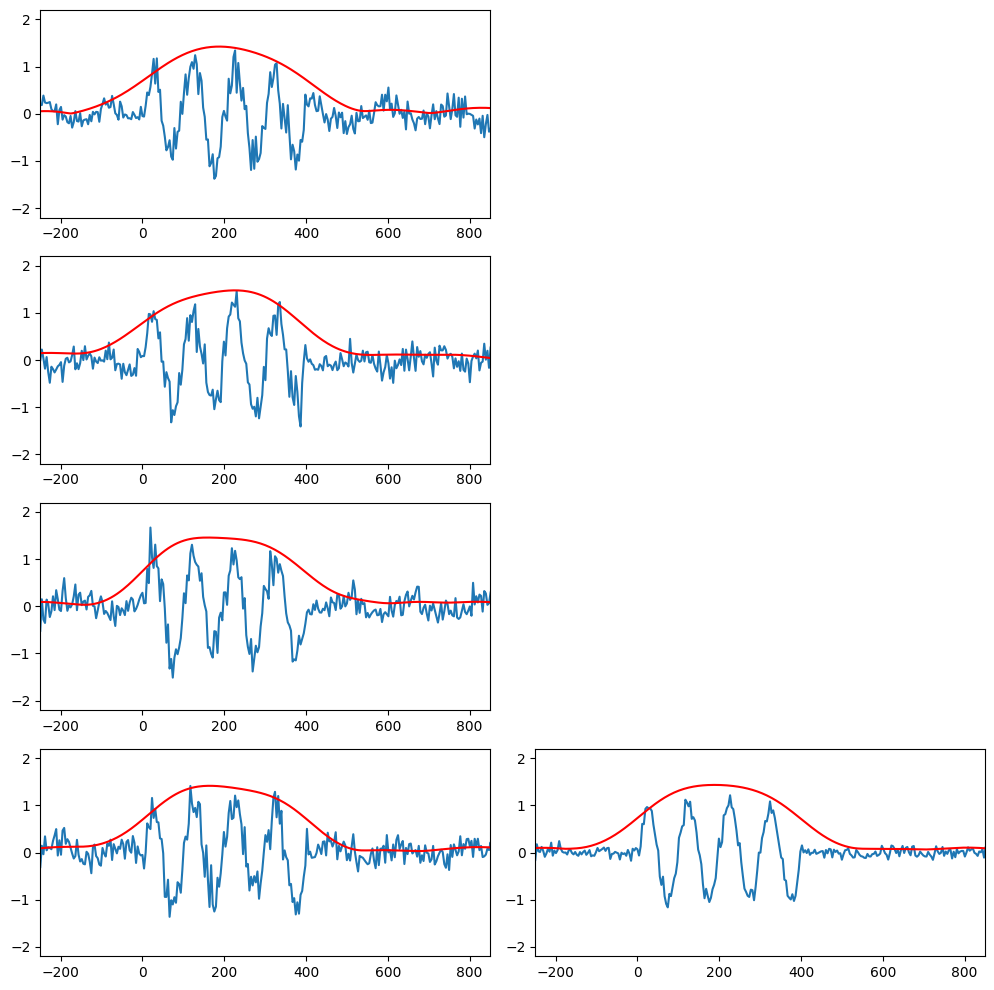

In [ ]:
# Time-locked and phase-locked analysis

nTrials = 4
data = np.zeros((nTrials, EEG['pnts'][0][0]))

# Wavelet parameters
wavetime = np.arange(-1, 1 + 1/EEG['srate'][0][0], 1/EEG['srate'][0][0])
n_conv = len(wavetime) + EEG['pnts'][0][0] - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, EEG['pnts'][0][0]))

plt.figure(figsize=(15, 10))

for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * EEG['times'][0] / 1000 + 2 * np.pi * (triali + 1) / nTrials - np.pi) + np.random.randn(EEG['pnts'][0][0]) / 6
    # Add phase-locked stimulus potential
    data[triali, 259:360] = data[triali, 259:360] + np.sin(2 * np.pi * 10 * EEG['times'][0][259:360] / 1000) + np.random.randn(101) / 5
    
    # Convolve with 10Hz wavelet
    convolution_result_fft = ifft(waveletfft * fft(data[triali, :], n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    convolution_result_fft = convolution_result_fft[int(np.floor(len(wavetime) / 2)) : -int(np.floor(len(wavetime) / 2))]
    data10hz[triali, :] = np.abs(convolution_result_fft)*2
    
    # Plot single trials
    plt.subplot(nTrials, 3, (triali) * 3 + 1)
    plt.plot(EEG['times'][0], data[triali, :])
    plt.plot(EEG['times'][0], data10hz[triali, :], 'r')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])

# Plot the mean over trials
plt.subplot(nTrials, 3, (triali) * 3 + 2)
plt.plot(EEG['times'][0], np.mean(data, axis=0))
plt.plot(EEG['times'][0], np.mean(data10hz, axis=0), 'r')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.tight_layout()
plt.show()

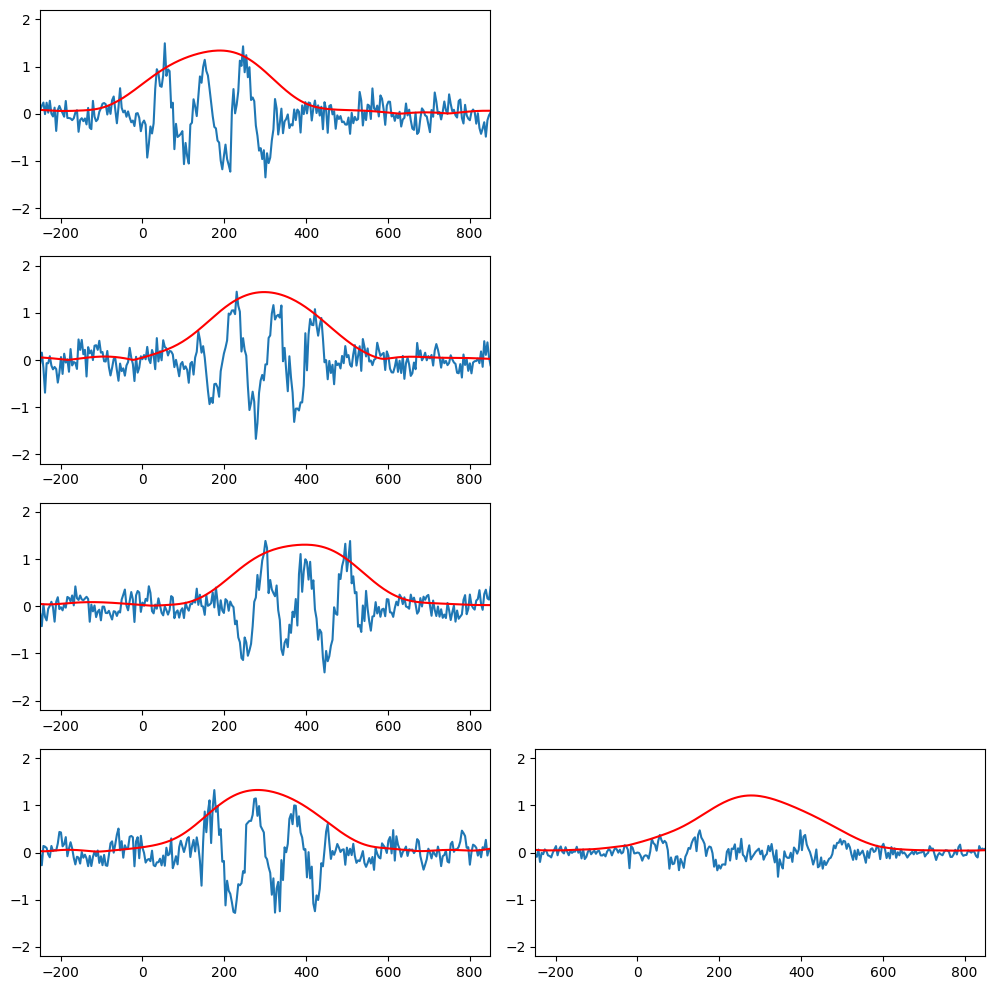

In [ ]:
# Non-time-locked and phase-locked analysis

nTrials = 4
data = np.zeros((nTrials, EEG['pnts'][0][0]))

# Wavelet parameters
wavetime = np.arange(-1, 1 + 1/EEG['srate'][0][0], 1/EEG['srate'][0][0])
n_conv = len(wavetime) + EEG['pnts'][0][0] - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, EEG['pnts'][0][0]))

plt.figure(figsize=(15, 10))

for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * EEG['times'][0] / 1000 + 2 * np.pi * (triali + 1) / nTrials - np.pi) + np.random.randn(EEG['pnts'][0][0]) / 6
    # Add non-time-locked, phase-locked stimulus potential
    eventtime = np.random.permutation(80) + 240
    eventtime = range(eventtime[0], eventtime[0] + 81)
    data[triali, eventtime] = data[triali, eventtime] + np.sin(2 * np.pi * 10 * EEG['times'][0][eventtime] / 1000 + 2 * np.pi * (triali + 1) / nTrials - np.pi) + np.random.randn(len(eventtime)) / 5
    
    # Convolve with 10Hz wavelet
    convolution_result_fft = ifft(waveletfft * fft(data[triali, :], n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    convolution_result_fft = convolution_result_fft[int(np.floor(len(wavetime) / 2)) : -int(np.floor(len(wavetime) / 2))]
    data10hz[triali, :] = np.abs(convolution_result_fft)*2
    
    # Plot single trials
    plt.subplot(nTrials, 3, (triali) * 3 + 1)
    plt.plot(EEG['times'][0], data[triali, :])
    plt.plot(EEG['times'][0], data10hz[triali, :], 'r')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])

# Plot the mean over trials
plt.subplot(nTrials, 3, (triali) * 3 + 2)
plt.plot(EEG['times'][0], np.mean(data, axis=0))
plt.plot(EEG['times'][0], np.mean(data10hz, axis=0), 'r')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.tight_layout()
plt.show()